## NBA Exploration 


https://www.kaggle.com/noahgift/nba-team-valuation-exploration/datahttps://www.basketball-reference.com/leagues/NBA_2017.html
This data set compares on the court performance in the NBA during the 2016-2017 Season with Salary,Pie scores,FG%,3P% and so on. We will use this dataset to answer the following questions. 

1. Does salary influence player performance ?
2. Do all teams in the  NBA each have a franchise player on there roster?
3. Who is better Kyrie Irving or Isaiah Thomas ? Who got the better part of the trade Cleveland or Boston ? 
 





In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import plotly.plotly as py
from scipy.stats import ttest_ind
from scipy.stats import linregress
import plotly 
plotly.tools.set_credentials_file(username='sabaazeez12', api_key='mba2mwuD9oFDHXz7cdBQ')
import seaborn as sns
import matplotlib.cm as cm
%pylab inline
 

Populating the interactive namespace from numpy and matplotlib


In [2]:
#Dataset 
df = pd.read_csv('~/Desktop/social-power-nba/nba_2017_players_with_salary_wiki_twitter.csv')
df1 = pd.read_csv('~/Desktop/social-power-nba/NBAplayerstats2016-2017.csv')
df.head()                  

,Unnamed: 0,Rk,PLAYER,POSITION,AGE,MP,FG,FGA,FG%,3P,...,DRPM,RPM,WINS_RPM,PIE,PACE,W,SALARY_MILLIONS,PAGEVIEWS,TWITTER_FAVORITE_COUNT,TWITTER_RETWEET_COUNT
0,0,1,Russell Westbrook,PG,28,34.6,10.2,24.0,0.425,2.5,...,-0.47,6.27,17.34,23.0,102.31,46,26.50,4279.0,2130.5,559.0
1,1,2,James Harden,PG,27,36.4,8.3,18.9,0.440,3.2,...,-1.57,4.81,15.54,19.0,102.98,54,26.50,3279.0,969.0,321.5
2,2,4,Anthony Davis,C,23,36.1,10.3,20.3,0.505,0.5,...,3.90,4.35,12.81,19.2,100.19,31,22.12,82.5,368.0,104.0
3,3,6,DeMarcus Cousins,C,26,34.2,9.0,19.9,0.452,1.8,...,0.64,4.20,11.26,17.8,97.11,30,16.96,1625.5,102.0,91.5
4,4,7,Damian Lillard,PG,26,35.9,8.8,19.8,0.444,2.9,...,-1.49,3.14,10.72,15.9,99.68,38,24.33,1830.5,186.5,43.0


In [3]:
df.describe() ##look at measures of Central Tendency and Dispersion of the dataset 


,Unnamed: 0,Rk,AGE,MP,FG,FGA,FG%,3P,3PA,3P%,...,DRPM,RPM,WINS_RPM,PIE,PACE,W,SALARY_MILLIONS,PAGEVIEWS,TWITTER_FAVORITE_COUNT,TWITTER_RETWEET_COUNT
count,239.000000,239.000000,239.000000,239.000000,239.000000,239.000000,239.000000,239.000000,239.000000,232.000000,...,239.000000,239.000000,239.000000,239.000000,239.000000,239.000000,239.000000,239.000000,236.000000,236.000000
mean,119.000000,195.401674,26.405858,23.139749,3.843515,8.482008,0.447686,0.952720,2.672803,0.303026,...,0.083640,-0.303975,3.449958,9.558996,98.544184,30.765690,8.091841,754.596234,237.466102,91.817797
std,69.137544,133.471733,4.433274,8.525964,2.280395,4.795601,0.070974,0.805798,2.066066,0.120666,...,1.607305,2.654697,4.204438,3.590322,2.648361,14.330563,6.955577,1699.982292,1025.210355,335.474533
min,0.000000,1.000000,19.000000,4.400000,0.200000,1.100000,0.200000,0.000000,0.000000,0.000000,...,-3.390000,-6.600000,-2.320000,-0.400000,91.120000,1.000000,0.060000,2.000000,0.000000,0.000000
25%,59.500000,77.500000,23.000000,16.350000,2.000000,4.750000,0.405000,0.300000,1.000000,0.283750,...,-1.145000,-2.135000,0.250000,7.250000,97.085000,21.000000,2.580000,146.500000,4.000000,8.000000
50%,119.000000,173.000000,26.000000,24.000000,3.400000,7.600000,0.444000,0.800000,2.400000,0.342000,...,-0.040000,-0.780000,1.860000,8.900000,98.430000,31.000000,5.370000,324.500000,22.500000,15.000000
75%,178.500000,306.500000,29.000000,30.600000,5.200000,11.250000,0.477500,1.500000,3.950000,0.373500,...,1.120000,1.230000,5.390000,11.700000,100.130000,40.000000,12.095000,642.750000,81.625000,47.875000
max,238.000000,475.000000,40.000000,37.800000,10.300000,24.000000,0.671000,4.100000,10.000000,0.538000,...,6.020000,8.420000,20.430000,23.000000,106.860000,66.000000,30.960000,17570.500000,12278.000000,2941.000000


# Question 1 - Does salary influence player performance ?

We will use the salary as are x variable and pie score as are y. 
The pie score is short for Player Impact Estimation. We want to see if there is a correalation between these two variables.We have discovered that the mean pie score is 9.55  and we know that players that make over 20 million or more are usually very good or the best player on their given team. 





 Do players making over 20 million or more have a pie score greater or equal to 9.55 ? 

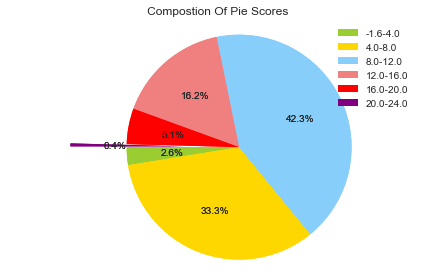

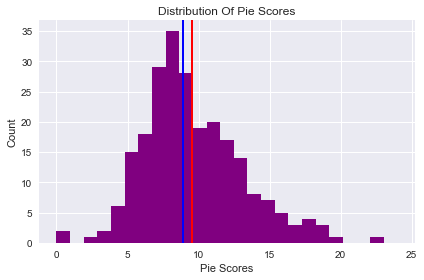

In [4]:
Pie = df['PIE'].astype(float) # convert to float 
a =df[(df['PIE'] > -1.6) & (df['PIE'] < 4.0)]  # breakdown categories for the pie chart 
b =df[(df['PIE'] > 4.0) & (df['PIE'] < 8.0)]
c =df[(df['PIE'] > 8.0) & (df['PIE'] < 12.0)]
d =df[(df['PIE'] > 12.0) & (df['PIE'] < 16.0)]
e =df[(df['PIE'] > 16.0) & (df['PIE'] < 20.0)]
f  =df[(df['PIE'] > 20.0) & (df['PIE'] < 24.0)]

# find the length of each category and form a list 
total_pie = [len(a),len(b),len(c),len(d),len(e),len(f)]

# Graph Pie chart 
explode = (0.0, 0.0, 0.0, 0.0, 0.0, 0.5)
label =['-1.6-4.0','4.0-8.0','8.0-12.0','12.0-16.0','16.0-20.0','20.0-24.0']
colors = ['yellowgreen', 'gold', 'lightskyblue', 'lightcoral','red','purple']
patches = plt.pie(total_pie,colors = colors, autopct='%1.1f%%', explode = explode, startangle=180)

plt.pie(total_pie,autopct='%1.1f%%',colors = colors, explode = explode, startangle=180)
plt.axis('equal')
plt.title("   Compostion Of Pie Scores")
plt.legend(loc='upper right', labels = label, shadow=True)
plt.tight_layout()
plt.show()


# Graph Histogram 
plt.hist(df["PIE"],bins = 25, range=(0.0,24),color ="purple")
plt.xlabel('Pie Scores')
plt.ylabel("Count")
plt.title("Distribution Of Pie Scores")
plt.axvline(df["PIE"].mean(), color='r', linestyle='solid', linewidth=2) #RED LINE IS MEAN
plt.axvline(df["PIE"].median(), color='b', linestyle='solid', linewidth=2)# BLUE LINE IS MEDIAN
 

plt.tight_layout()
plt.show()


From the pie chart we are able to tell that 42.3% of basketball players in the given dataset have a pie score between 8.0-12.0.If we look at our histogram we can see how our distribution of pie scores looks bimodal and slightly skewed. I decided to draw a vertical line for the mean and median to decide which will be a better central tendency measurement to use. I found out that the median was closer to the middle of the distribution than the mean. Now that we have looked at the compositon of our data. We want to check if there is any correlation between pie scores and salary. We will test this out by using a scatter plot. 

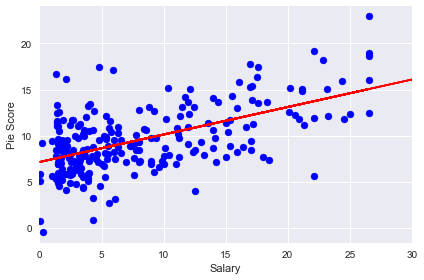

In [5]:
# Draw scatter plot 
x= df['SALARY_MILLIONS']
y= df['PIE']

plt.scatter(x= df['SALARY_MILLIONS'],y= df['PIE'], color = 'blue')
plt.ylim(-1.6,24.0)
plt.xlim(0,30)
plt.xlabel('Salary')
plt.ylabel("Pie Score")



# calc the trendline
z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x,p(x),"r")

plt.tight_layout()
plt.show()



The scatter plot shows a weak positive correlation between salary and pie score of the nba players given in the dataset.We can see on the graph that  the pie score tends to increase as the salary  increases. Players with a salary over 20 million tend to have very high pie scores based on the scatter plot. Even though there is a somewhat of a correlation does not mean the information is significant enough to make an inference. Lets look at the distribution of pie scores per position. 

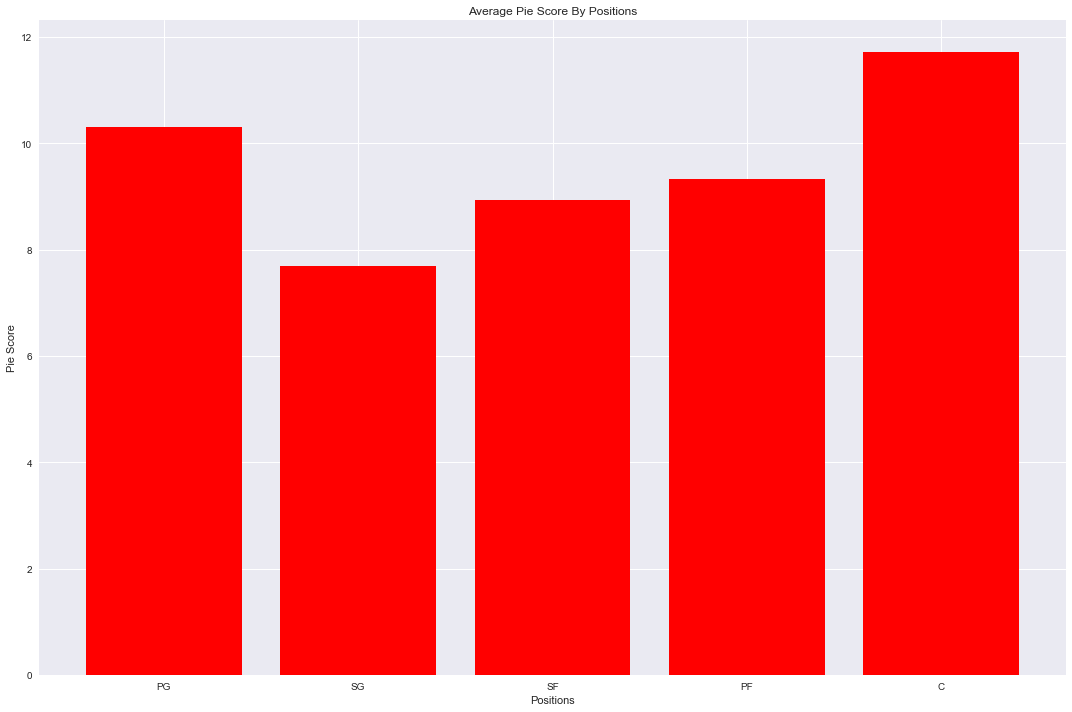

In [6]:
pos_piechart = pd.DataFrame({'PIE' : df["PIE"],'Pos': df["POSITION"]}) # create new dataframe with Pie and Position as the only two columns
# splite dataframe by positons 
pg = pos_piechart['Pos'] == "PG"
sg =pos_piechart['Pos'] == "SG"
sf =pos_piechart['Pos'] == "SF"
pf = pos_piechart['Pos'] == "PF"
c = pos_piechart['Pos'] == "C"
# Find the average pie score for each position
pg_mean = pos_piechart[pg].mean()
sg_mean =pos_piechart[sg].mean()
sf_mean =pos_piechart[sf].mean()
pf_mean =pos_piechart[pf].mean()
c_mean =pos_piechart[c].mean()

#draw bar graph 
position_names = ["PG","SG","SF","PF","C"] # positions 
pos_means = [pg_mean,sg_mean,sf_mean,pf_mean,c_mean] # means of each position 

y_pos = np.arange(len(pos_means))
plt.figure(figsize=(15, 10))
plt.bar(y_pos,pos_means,color= "Red")
plt.xticks(y_pos,position_names)
plt.xlabel("Positions")
plt.ylabel("Pie Score")
plt.title("Average Pie Score By Positions")
plt.tight_layout()
plt.show()





We can see that point guards and centers have overall better pie scores than other positions. We also can see shooting guards and small forwards have the worse averages compared to other positions. What does this say? To me this says that point guards and centers make overall a bigger impact than other positions played or maybe the NBA has a significant amount of point guards or centers.  

In [7]:
# average of each pie score by position table chart 
position_averagechart = pd.DataFrame({'PIE' : [10.29,7.69,8.93,9.32,11.72] ,'Pos': position_names}) 
position_averagechart.head()

,PIE,Pos
0,10.29,PG
1,7.69,SG
2,8.93,SF
3,9.32,PF
4,11.72,C


#  Question 2 - Do all teams in the  NBA each have a franchise player on there roster?

First lets break this question down. Lets define what a franchise player is a franchise player is somebody who gets good individual stats, is a high-level contributor to the team, and is someone who has a good to great overall skill set with maybe one or two elite skills. Now that we know some characteristics of what a franchise player embodies we can now look at our dataset and determine if each team has at least 1 franchise player.Key variables that we can use to determine if a player is considered a franchise player are FG%,Assists and Rebounds.There are numerous of stats we can use to determine if a player is a franchise player but I personally decided to use these three variables because there are the most known stats in the NBA. I will also choose players that are the top 25% in the league in all three categories.

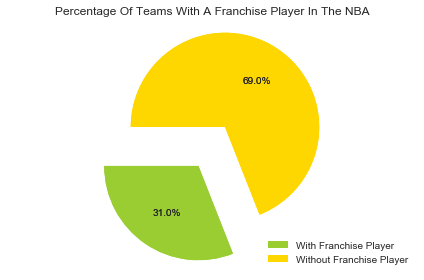

In [8]:
#Grab dataset 
df3 = pd.read_csv('~/Desktop/social-power-nba/NBAplayerstats2016-2017.csv')

df3.describe()

#Grab upper percentile 
top_assists = 158.4
top_rebounds =314.0
top_FG = .485
# make a dataframe consisting of the franchise players 
a= df3[df3['AST'] >= top_assists] 
b=a[a['TRB'] >= top_rebounds] 
franchise_players = b[b['FG%'] >= top_FG]


## GRAPH PIE CHART 
team_names = franchise_players["Tm"].tolist() 
n = len(franchise_players["Tm"])

total_pie = [df3["Tm"].nunique()-1/n, 100-df3["Tm"].nunique()-1/n]
explode = (0.0, 0.5)
label =['With Franchise Player', 'Without Franchise Player']
colors = ['yellowgreen', 'gold', 'lightskyblue']
patches = plt.pie(total_pie,colors = colors, autopct='%1.1f%%', explode = explode, startangle=180)

plt.pie(total_pie,autopct='%1.1f%%',colors = colors, explode = explode, startangle=180)
plt.axis('equal')
plt.title("Percentage Of Teams With A Franchise Player In The NBA")
plt.legend(loc='best', labels = label, shadow=True)
plt.tight_layout()
plt.show()




    
    

From this data we can see that 31% percent of teams in the NBA have a franchise player defined by my definition.With this information lets take a deeper look into how this can affect a team. Lets take a look at the teams with at least one  franchise player regular season record last year. 

In [9]:
#grab dataset 
df4 = pd.read_csv('~/Desktop/social-power-nba/NBAteamstats2016-2017regularseason.csv')
df4

,Team,W,L,W/L%,PS/G,PA/G,SRS
0,Boston Celtics,53,29,0.646,108.0,105.4,2.25
1,Cleveland Cavaliers,51,31,0.622,110.3,107.2,2.87
2,Toronto Raptors,51,31,0.622,106.9,102.6,3.65
3,Washington Wizards,49,33,0.598,109.2,107.4,1.36
4,Atlanta Hawks,43,39,0.524,103.2,104.0,-1.23
5,Milwaukee Bucks,42,40,0.512,103.6,103.8,-0.45
6,Indiana Pacers,42,40,0.512,105.1,105.3,-0.64
7,Chicago Bulls,41,41,0.500,102.9,102.4,0.03
8,Miami Heat,41,41,0.500,103.2,102.1,0.77
9,Detroit Pistons,37,45,0.451,101.3,102.5,-1.29


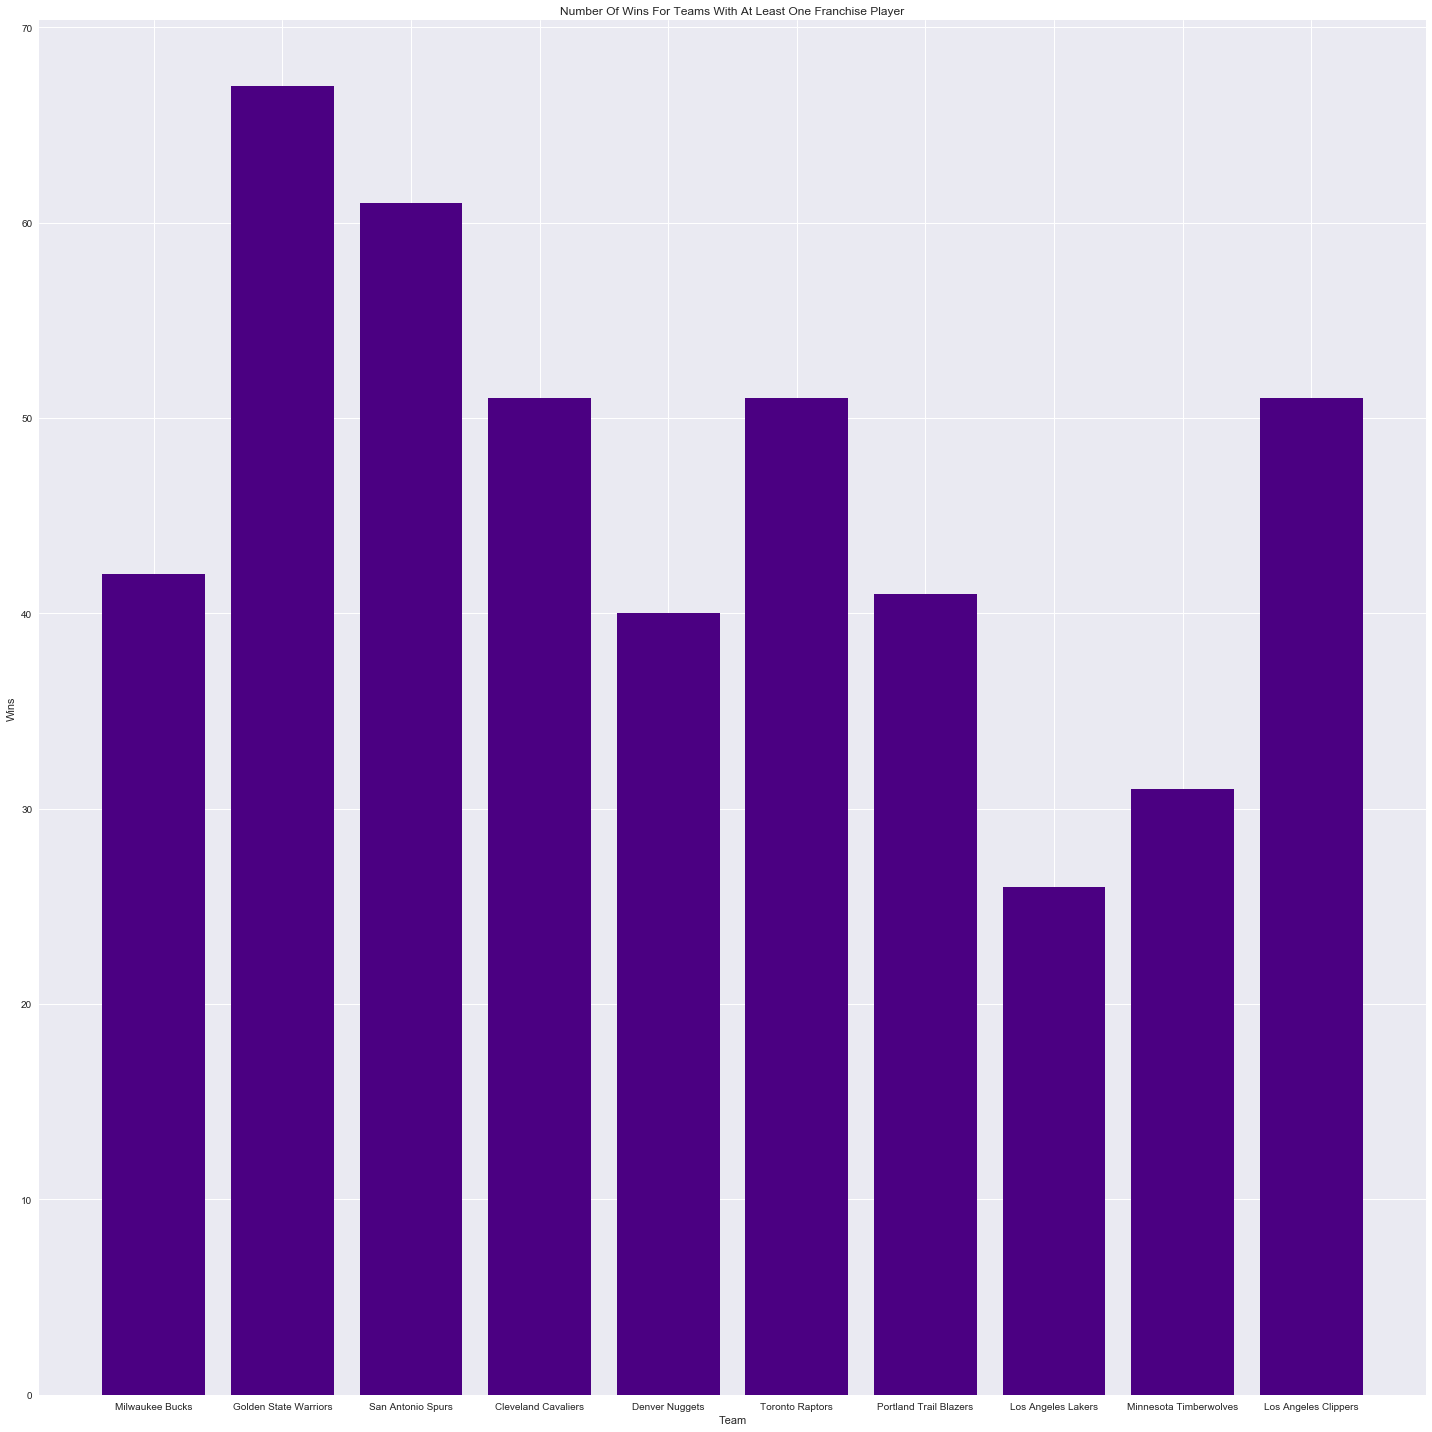

In [44]:

#make df with team names and wins 
d = {'Team' : df4["Team"],'Wins' : df4["W"]}
team = pd.DataFrame(d)




#team with franchise player records 
#draw bar graph 

team_names = ["Milwaukee Bucks","Golden State Warriors","San Antonio Spurs","Cleveland Cavaliers","Denver Nuggets","Toronto Raptors",
              "Portland Trail Blazers","Los Angeles Lakers","Minnesota Timberwolves","Los Angeles Clippers"] #Teams with Franchise Players
team_wins = [42,67,61,51,40,51,41,26,31,51] # Wins 

y_pos = np.arange(len(team_wins))
plt.figure(figsize=(20, 20))
plt.bar(y_pos,team_wins,color= "Indigo")
plt.xticks(y_pos,team_names)
plt.xlabel("Team")
plt.ylabel("Wins")
plt.title("Number Of Wins For Teams With At Least One Franchise Player")
plt.tight_layout()
plt.show()


From the graph above you can see that most teams that had a franchise player had a good season. 70 percent of teams with a franchise player made the playoffs last season. Also 70 percent of teams also won at least 50 percent of there games last season. There were three teams that did not have over .500 winning average. These teams were Minnesota Timberwolves,Los Angeles Lakers and Denver Nuggets. These is very interesting the Denver Nuggets won 40 games last year which is 48 percent which made them short of 50 percent win average. It will make sense that the Timberwolvesand the Lakers will have a franchise player. They have drafted in the top 10 in the last two NBA drafts. This tells us that they are rebuilding there team and also tells us they are drafting high caliber players. 

#  Question 3 - Who is better Kyrie Irving or Isaiah Thomas ? 
#  Who got the better part of the trade Cleveland or Boston ? 
 




In [45]:
# Grab kyrie and Isaiah stats 
kyrie_irving = df3["Player"] == "Kyrie Irving"
isaiah_thomas = df3["Player"] == "Isaiah Thomas"
russell_westbrook = df3["Player"] == "Russell Westbrook" 
john_wall = df3["Player"] == "John Wall" 
stephen_curry = df3["Player"] == "Stephen Curry" 

ki_stats = df3[kyrie_irving]
it_stats = df3[isaiah_thomas]
rw_stats = df3[russell_westbrook]
jw_stats = df3[john_wall]
sc_stats = df3[stephen_curry]

#merge rows 
stats = ki_stats
stats = stats.append(it_stats)
stats = stats.append(rw_stats) 
stats = stats.append(jw_stats)
stats = stats.append(sc_stats)

stats2 = stats[["FG%", "2P%",'eFG%','FT%']] 

# take the list of column headers 
column_names = list(it_stats.columns)

#remove and drop none numeric columns 
stats = stats.drop('Player', axis=1);
stats = stats.drop("Pos", axis =1);
stats = stats.drop("Tm", axis =1)                       
stats = stats.drop("FG%", axis =1)
stats = stats.drop("3P%", axis =1)
stats = stats.drop("2P%", axis =1)
stats = stats.drop('eFG%', axis =1)
stats = stats.drop('FT%', axis =1)


# take the difference from each stat
diff = stats.diff()
diff.head()
diff = diff.iloc[1:] # remove NAN
diff2 = pd.DataFrame(diff.iloc[0])
stats.index =  ["Kyrie Irving","Isaiah Thomas","Russell Westbrook", "John Wall","Stephen Curry"]
stats2.index = ["Kyrie Irving","Isaiah Thomas","Russell Westbrook", "John Wall","Stephen Curry"]



In [23]:
stats

,Rk,Age,G,GS,MP,FG,FGA,3P,3PA,2P,...,FTA,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
Kyrie Irving,215,24,72,72,2525,671,1420,177,441,494,...,328,52,178,230,418,83,24,180,157,1816
Isaiah Thomas,424,27,76,76,2569,682,1473,245,646,437,...,649,43,162,205,448,70,13,210,167,2199
Russell Westbrook,458,28,81,81,2802,824,1941,200,583,624,...,840,137,727,864,840,132,31,438,190,2558
John Wall,452,26,78,78,2836,647,1435,89,272,558,...,527,59,267,326,831,157,49,322,151,1805
Stephen Curry,98,28,79,79,2638,675,1443,324,789,351,...,362,61,292,353,524,142,17,239,183,1999


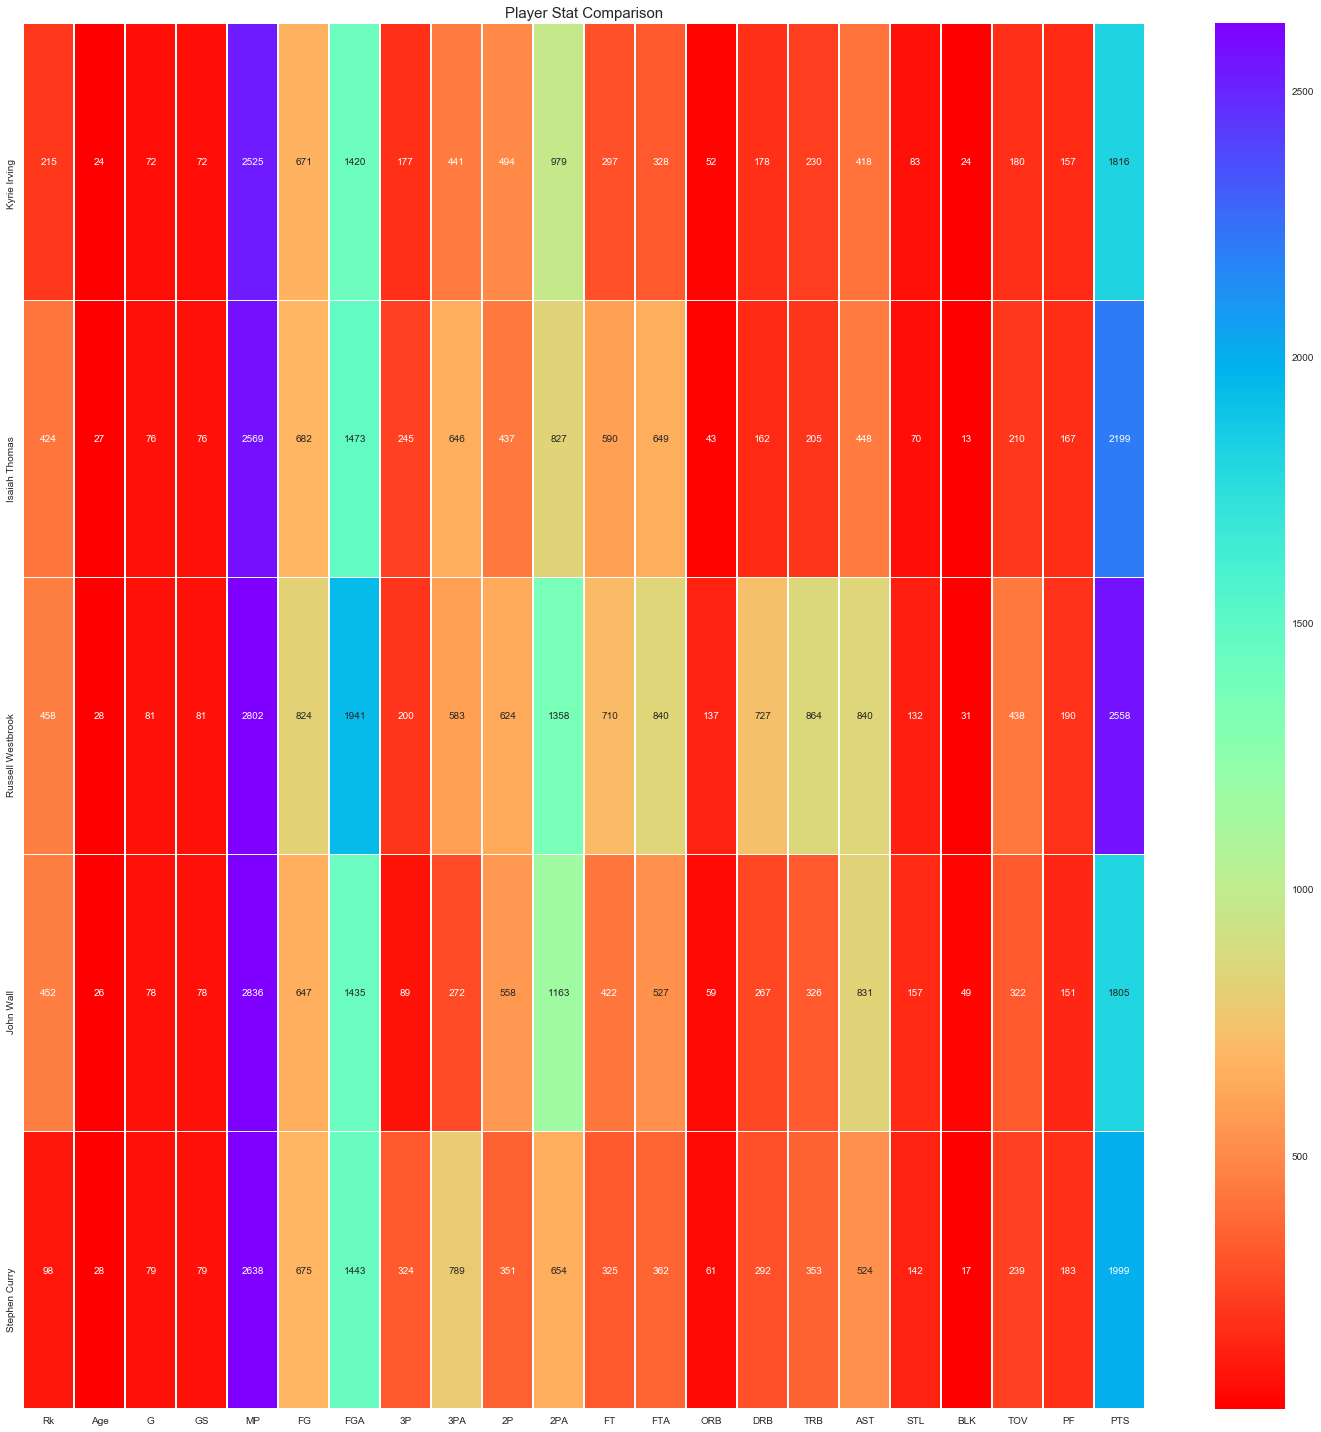

In [42]:
#draw heatmap 
plt.figure(figsize=(20,20))
plt.title('Player Stat Comparison', size = 15)
sns.heatmap(stats, robust=True,  annot=True, fmt ="",  linewidths=.5, cmap = 'rainbow_r')
plt.tight_layout()
plt.show()

In this given heat chart we can see each players individual stats for last season and compare them to each other.If we take a further look we can see how Kyrie Irving and Isaiah Thomas compare to one another stat by stat. First thing that stuck out to me was there age. Kyrie Irving and Isaiah Thomas were drafted in the same draft class but Isaiah is 3 years older than Kyrie. That obviously tells me that Isaiah was a lower pick and stayed in college longer than Kyrie.Another thing that also stood out was the amount of turnovers Isaiah Thomas 30 more turnovers than Kyrie. The are numerous observations I made by looking at this chart but I also was interested in there efficiency at shooting so I made another heatmap to further look into these stats. 

In [26]:
stats2

,FG%,2P%,eFG%,FT%
Kyrie Irving,0.473,0.505,0.535,0.905
Isaiah Thomas,0.463,0.528,0.546,0.909
Russell Westbrook,0.425,0.459,0.476,0.845
John Wall,0.451,0.480,0.482,0.801
Stephen Curry,0.468,0.537,0.580,0.898


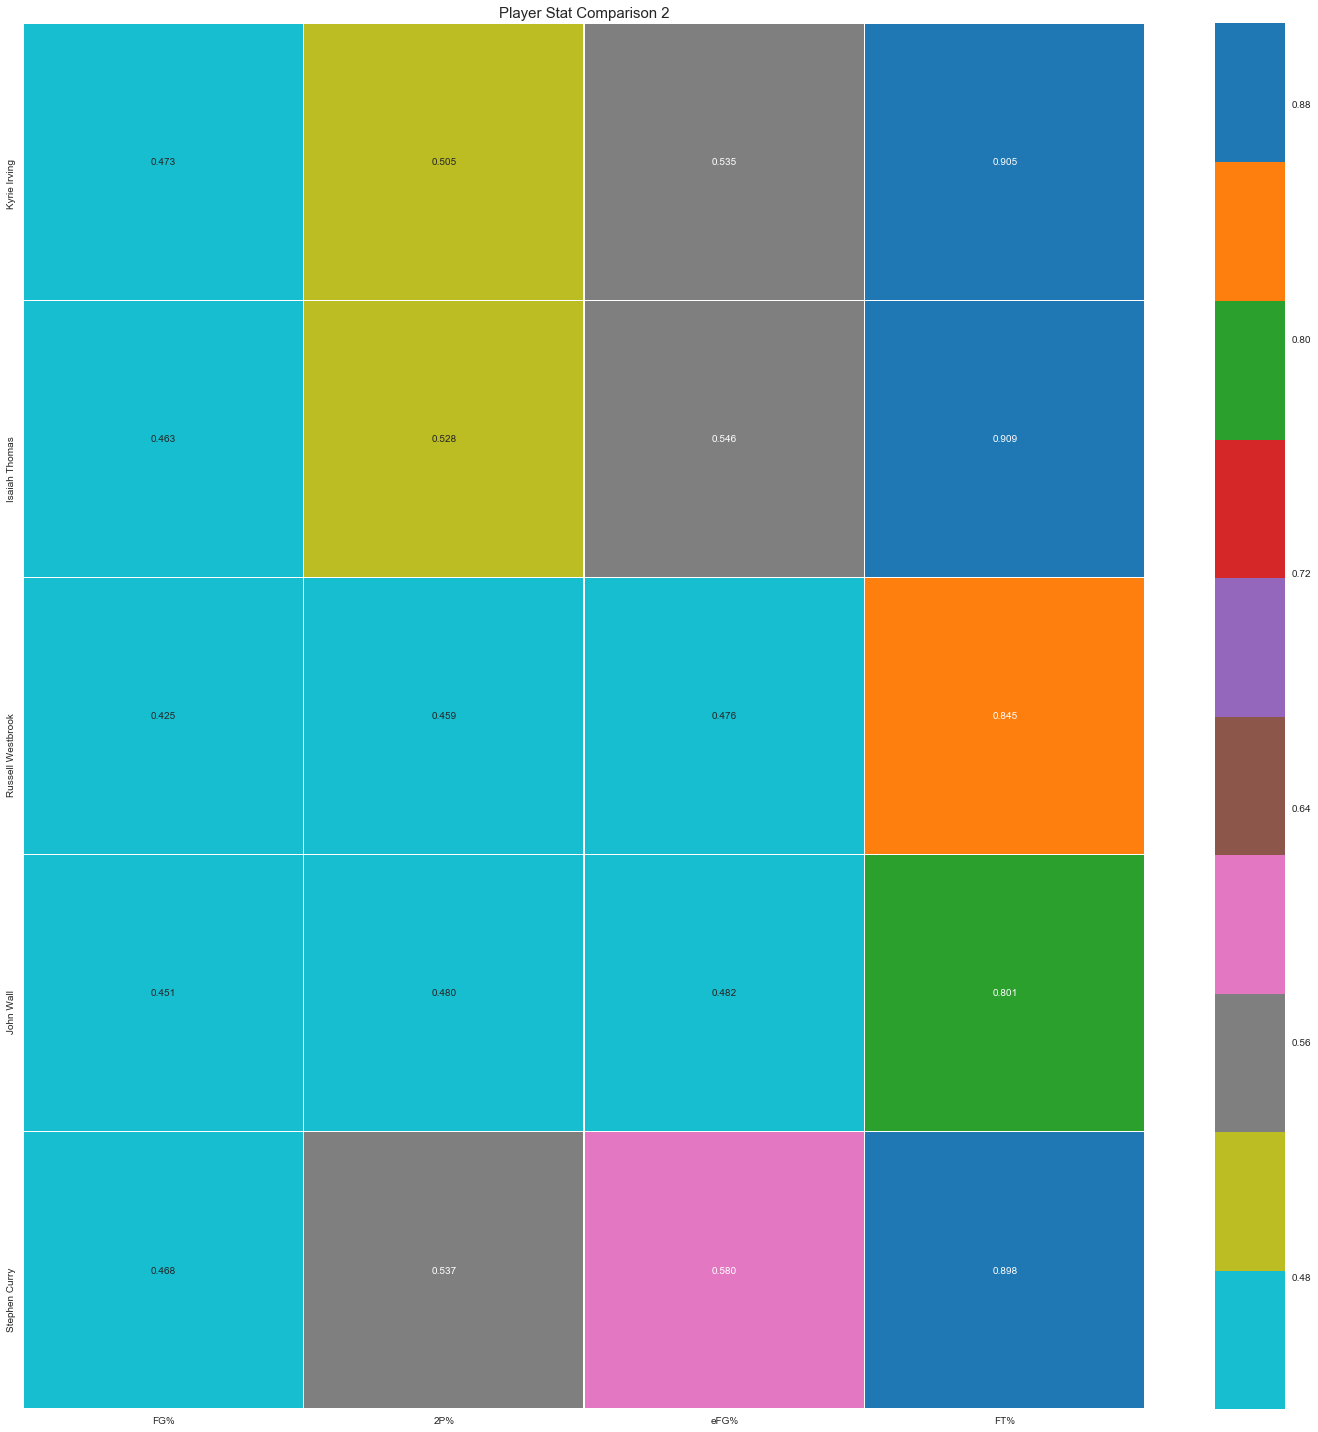

In [35]:
#draw heatmap 
plt.figure(figsize=(20,20))
plt.title('Player Stat Comparison 2', size = 15)
sns.heatmap(stats2,robust =True,  annot=True, fmt =".3f",  linewidths=.5, cmap = 'tab10_r')
plt.tight_layout()
plt.show()

If we solely look at these stats and efficiency Isaiah Thomas has Kyrie Irving beat in 3 out of the 4 categories presented in the heatmap. Kyrie is just slightly better by .010 better than Isaiah when it comes to FG%. There are numerous factors to consider to decide which player was overall better just based on last season stats. You have to consider accolades,career achievements, comparing both players best seasons. Based on the stats given I feel that the Cavaliers won the trade but by a slight margin. Now if we factor in the whole package of the trade the Cavaliers won this trade based on my insight and information provided. Here is why Isaiah Thomas and Kyrie Irving healthy both are have similar stats that vary at very small margins. So stat wise Cleveland is not taking a loss even though it looks like they are on the outside looking in. Cleveland is basically replacing its productivity at the point guard position with someone who is the same caliber player. 

# Conclusion


1. Does salary influence player performance ?
   Yes, we can assume that there is a correalation between salary and player performance but have to factor in other variables.
2. Do all teams in the  NBA each have a franchise player on there roster? Based on the analysis we have discovered that this is false. We also discovered that majority of players that were considered franchise players based on my definition were on teams with over .500 winning. 
3. Who is better Kyrie Irving or Isaiah Thomas ? Based on our analysis we discovered that Isaiah Thomas was the better player last season but that does not make him overall a better player. 
Who won the trade Cleveland or Boston ? 
Cleveland got the better part of the trade if we excluded other parts of the deal and solely looked at player by player.It may seem shocking but Isaiah Thomas is highly undderated based on my analysis.  




# Further Research 


For further reasearch I will consider the distrubution of the data to see if they are all normally distrubuted or not. I will also consider certain biases that can skew my results such as seeing if all the teams have the same number of players, players who were injured during the season, players who were traded and so on. These are all factors that will need to be considered because they can greatly impact your results in your analysis. 